c:\users\sarth\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


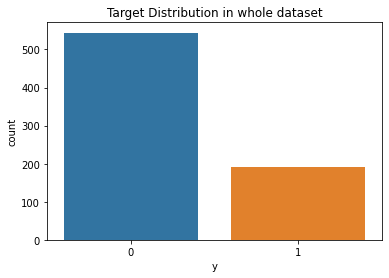

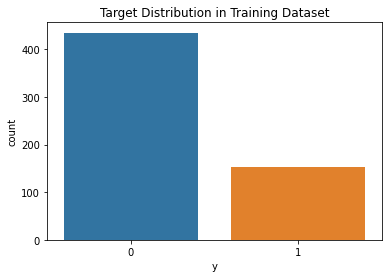

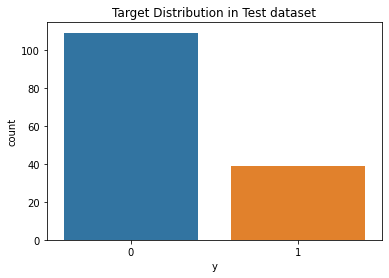

In [47]:
'''
This function generates the training and testing dataset to be used for training and testing purposes with various models respectively. 
'''
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

def generate_train_test_data(split = 0.2, random_state = 42, scaling = 'standard', sampling = False, show_plots = True):

	'''
	This method generates the training and test data. 
	Parameters :- split : Float, (0,1) - fraction of size of testing data to be used to test the model.
				  random_state : Integer - state of the randomization of the sampling data.
				  scaling : String, 'normal_negative', 'normal_positive', 'standard' - Type of scaling to be used, scaling data by 
				  																		[-1,1], [0,1], Standard Normal respectively
				  sampling : Boolean - To generate synthetic data using training data with SMOTE
				  show_plots : Boolean - To show target variable distribution after each sampling method.											
	'''

	data = pd.read_csv('raw.csv', index_col = [0])

	X = data[data.columns[0:100]]

	y = data['y']

	sns.countplot(y).set_title('Target Distribution in whole dataset')
	plt.show()

	X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, stratify = y, test_size = split)


	if scaling == 'normal_negative':
		scale = MinMaxScaler(feature_range = (-1,1))

	elif scaling == 'normal_positive':
		scale = MinMaxScaler()

	elif scaling == 'standard':
		scale = StandardScaler()

	if sampling == False:

		X_train = scale.fit_transform(X_train)
		X_test = scale.transform(X_test)

		if show_plots == True:
			sns.countplot(x = y_train).set_title('Target Distribution in Training Dataset')
			plt.show()
			sns.countplot(x = y_test).set_title('Target Distribution in Test dataset')
			plt.show()

		return X_train, X_test, y_train, y_test

	else:

		if show_plots == True:
			sns.countplot(x = y_train).set_title('Target Distribution in Training Dataset without SMOTE')
			plt.show()

		oversample = SMOTE()
		X_train, y_train = oversample.fit_resample(X_train, y_train)

		X_train = scale.fit_transform(X_train)
		X_test = scale.transform(X_test)

		if show_plots == True:
			sns.countplot(x = y_train).set_title('Target Distribution in Training Dataset with SMOTE')
			plt.show()
			sns.countplot(x = y_test).set_title('Target Distribution in Test dataset')
			plt.show()
		return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = generate_train_test_data()


In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

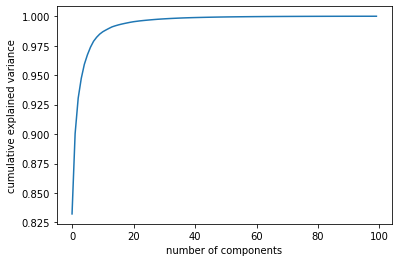

In [49]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [50]:
print(pca.explained_variance_ratio_)

[8.32214554e-01 6.80870085e-02 3.01980489e-02 1.67531396e-02
 1.19318761e-02 8.06575347e-03 6.48119550e-03 5.02662340e-03
 3.40405250e-03 2.68574208e-03 1.98543693e-03 1.47386294e-03
 1.37871434e-03 1.28270739e-03 8.67465133e-04 7.58983203e-04
 6.64822126e-04 5.78831057e-04 5.40981284e-04 5.24306654e-04
 4.51324520e-04 3.45634277e-04 3.40623946e-04 2.74077671e-04
 2.60780343e-04 2.42154924e-04 2.23968311e-04 2.19795398e-04
 1.96769442e-04 1.74375556e-04 1.64057341e-04 1.51418214e-04
 1.38430484e-04 1.27295162e-04 1.18355877e-04 1.14374910e-04
 1.07003693e-04 9.29053816e-05 8.34211083e-05 7.64224545e-05
 7.21690345e-05 6.35429233e-05 6.19444176e-05 6.08904059e-05
 5.71466231e-05 5.41255110e-05 5.10612834e-05 4.75022746e-05
 4.61196092e-05 4.12414605e-05 3.99217567e-05 3.64928022e-05
 3.41243419e-05 3.18809427e-05 3.08591407e-05 2.69375460e-05
 2.62426965e-05 2.59507244e-05 2.49154694e-05 2.25663680e-05
 2.11829232e-05 1.98987930e-05 1.83674980e-05 1.75119849e-05
 1.73306736e-05 1.554353

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
X_test_df = pd.DataFrame(data = y_train, columns = ['y'])
print(X_test_df)
finalDf = pd.concat([principalDf, X_test_df], axis = 1)
finalDf
print(len(y_train))

     y
710  0
644  0
458  0
607  0
718  0
..  ..
717  0
190  1
308  0
347  0
463  0

[588 rows x 1 columns]
588


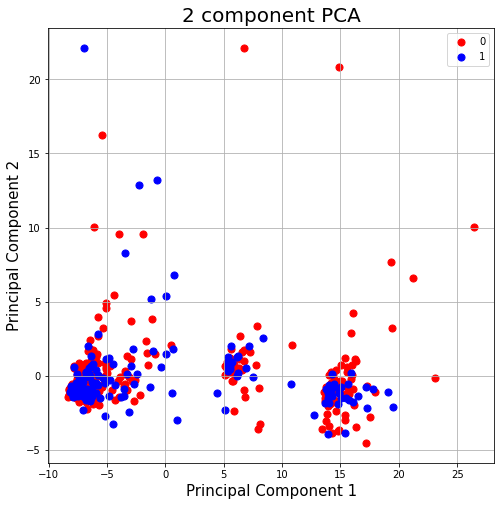

In [52]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


c:\users\sarth\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


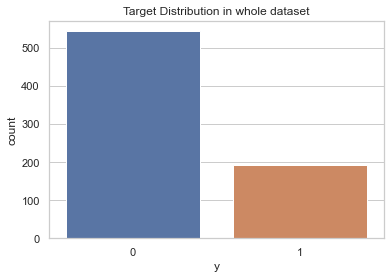

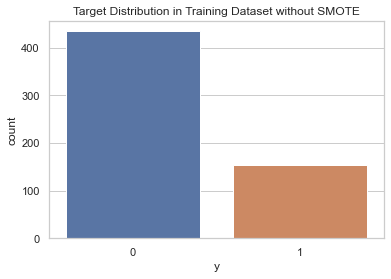

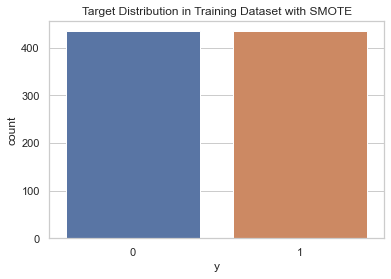

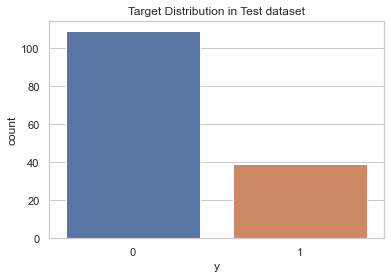

In [86]:
X_train, X_test, y_train, y_test = generate_train_test_data(sampling = True)

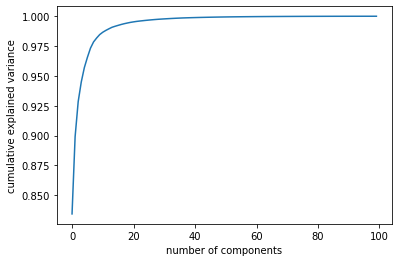

In [54]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [43]:
print(pca.explained_variance_ratio_)

[8.20119703e-01 7.51044285e-02 3.03346239e-02 1.69507912e-02
 1.25859601e-02 9.12459777e-03 7.09130537e-03 5.26682168e-03
 3.40533347e-03 3.31667937e-03 2.09908505e-03 1.53564442e-03
 1.46955208e-03 1.34317747e-03 9.87880842e-04 8.36755201e-04
 8.06888765e-04 6.59123562e-04 6.42982733e-04 5.62367153e-04
 4.67778634e-04 4.08019631e-04 4.02229210e-04 3.31039871e-04
 3.06374670e-04 2.76654526e-04 2.42141086e-04 2.35581823e-04
 2.19393240e-04 2.03392124e-04 1.95850184e-04 1.69289613e-04
 1.59709944e-04 1.39732745e-04 1.32911637e-04 1.31215279e-04
 1.15747028e-04 1.11330577e-04 9.43778760e-05 8.45234820e-05
 8.09254695e-05 7.26408950e-05 6.79176350e-05 6.36415769e-05
 6.23453282e-05 5.87496239e-05 5.57804646e-05 5.30553859e-05
 5.02968203e-05 4.94685618e-05 4.50392473e-05 4.30427751e-05
 4.08181447e-05 3.50173445e-05 3.30983225e-05 3.14943559e-05
 2.91278094e-05 2.84641497e-05 2.67439648e-05 2.51454603e-05
 2.44049253e-05 2.10988777e-05 2.04715133e-05 1.97440616e-05
 1.88234597e-05 1.718182

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
X_test_df = pd.DataFrame(data = y_train, columns = ['y'])
finalDf = pd.concat([principalDf, X_test_df], axis = 1)
finalDf

,principal component 1,principal component 2,y
0,-3.573360,0.927240,0
1,-6.385959,-0.864869,0
2,1.881474,-0.593833,0
3,-6.571321,-0.603535,0
4,22.082918,-2.258629,0
...,...,...,...
865,-6.537291,-0.705390,1
866,-3.724349,3.544379,1
867,17.097235,-3.487194,1
868,-5.245789,0.394816,1


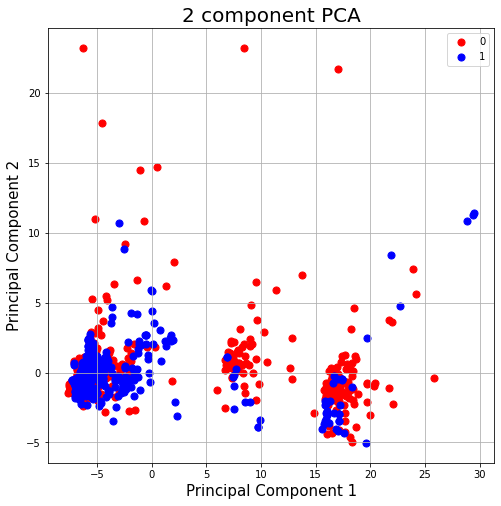

In [56]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Feature Selection Using Anova

c:\users\sarth\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


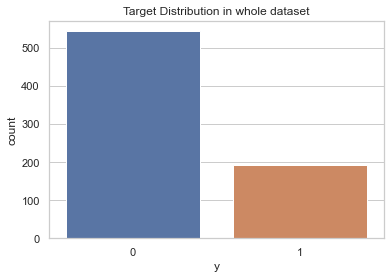

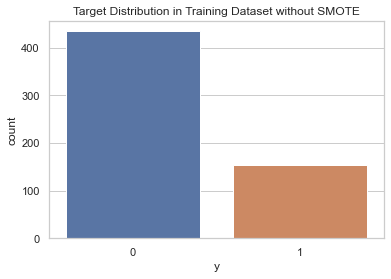

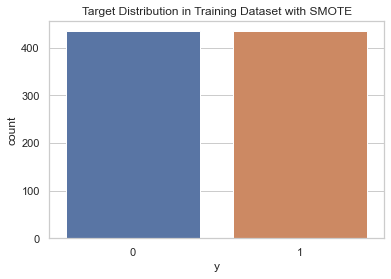

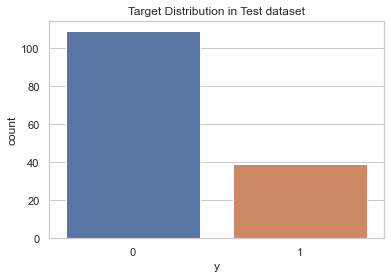

In [111]:
X_train, X_test, y_train, y_test = generate_train_test_data(scaling = 'normal_negative',sampling = True)


In [112]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=0)

In [125]:
values_K = [i for i in range(40, 101, 5)]
     

store = []

for k in values_K:


    print('K: ', k)

    trainX_copy = X_train
    trainY_copy = y_train
    testX_copy = X_val
    testY_copy = y_val

    #         print('---------------------------')
    #         print('k = ', k, '| n_components = ', n_comp)

    sel = SelectKBest(f_classif, k=k)
    trainX_copy = sel.fit_transform(X_train, y_train)
    testX_copy = sel.transform(X_val)

    
    param_grid = {'n_estimators': [300],
           'criterion': ['gini'],
              'max_depth': [10],
              'min_samples_split': [5],
              'max_features': ['auto'],
              'random_state':[0]
            
           }

    grid = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'f1',cv=5,refit=True)  # , verbose = 3)
    grid.fit(trainX_copy, trainY_copy)

    #         print(grid.best_params_)
    #         print(grid.best_estimator_)

    #         print('Training Accuracy: ', grid.score(trainX_copy, trainY_copy))
    #         print('Testing Accuracy: ', grid.score(testX_copy, testY_copy))

    store.append({'k': k,'cv_f1_score': grid.best_score_,'score':grid.score(testX_copy,testY_copy)})


print('BEST VALUES OF K FOR ANOVA ACCORDING TO TRAIN: ')
print(max(store, key=lambda x: x['cv_f1_score']))
print('BEST VALUES OF K FOR ANOVA ACCORDING TO VAL: ')
print(max(store, key=lambda x: x['score']))



K:  40
K:  45
K:  50
K:  55
K:  60
K:  65
K:  70
K:  75
K:  80
K:  85
K:  90
K:  95
K:  100
BEST VALUES OF K FOR ANOVA ACCORDING TO TRAIN: 
{'k': 95, 'cv_f1_score': 0.8286708365614898, 'score': 0.8556701030927835}
BEST VALUES OF K FOR ANOVA ACCORDING TO VAL: 
{'k': 95, 'cv_f1_score': 0.8286708365614898, 'score': 0.8556701030927835}


In [ ]:
BEST VALUES OF K FOR ANOVA ACCORDING TO TRAIN: 
{'k': 95, 'cv_f1_score': 0.8286708365614898, 'score': 0.8556701030927835}
BEST VALUES OF K FOR ANOVA ACCORDING TO VAL: 
{'k': 95, 'cv_f1_score': 0.8286708365614898, 'score': 0.8556701030927835}

In [126]:
print('BEST VALUES OF K FOR ANOVA: ')
print(max(store, key=lambda x: x['cv_f1_score']))

store

BEST VALUES OF K FOR ANOVA: 
{'k': 95, 'cv_f1_score': 0.8286708365614898, 'score': 0.8556701030927835}


[{'k': 40, 'cv_f1_score': 0.8100145995125196, 'score': 0.841025641025641},
 {'k': 45, 'cv_f1_score': 0.810672168207774, 'score': 0.8426395939086294},
 {'k': 50, 'cv_f1_score': 0.8076527099186711, 'score': 0.8350515463917525},
 {'k': 55, 'cv_f1_score': 0.8145334025584147, 'score': 0.841025641025641},
 {'k': 60, 'cv_f1_score': 0.8163627147753998, 'score': 0.8426395939086294},
 {'k': 65, 'cv_f1_score': 0.8134196312507571, 'score': 0.8341708542713567},
 {'k': 70, 'cv_f1_score': 0.8189473377782486, 'score': 0.841025641025641},
 {'k': 75, 'cv_f1_score': 0.8186185512871568, 'score': 0.8497409326424871},
 {'k': 80, 'cv_f1_score': 0.8153940200360064, 'score': 0.841025641025641},
 {'k': 85, 'cv_f1_score': 0.8212835827234871, 'score': 0.8367346938775511},
 {'k': 90, 'cv_f1_score': 0.8259843453566772, 'score': 0.8367346938775511},
 {'k': 95, 'cv_f1_score': 0.8286708365614898, 'score': 0.8556701030927835},
 {'k': 100, 'cv_f1_score': 0.8281046798342612, 'score': 0.8556701030927835}]

In [128]:
k_val_anova = []
train_anova_score = []
val_anova_score = []
for i in range(len(store)):
    k_val_anova.append(store[i]['k'])
    train_anova_score.append(store[i]['cv_f1_score'])
    val_anova_score.append(store[i]['score'])




,k_Val,cv_f1_score,val_score
0,40.0,0.810015,0.841026
1,45.0,0.810672,0.842640
2,50.0,0.807653,0.835052
3,55.0,0.814533,0.841026
4,60.0,0.816363,0.842640
5,65.0,0.813420,0.834171
6,70.0,0.818947,0.841026
7,75.0,0.818619,0.849741
8,80.0,0.815394,0.841026
9,85.0,0.821284,0.836735


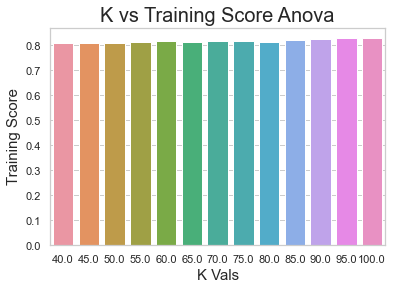

In [129]:
anova_df = pd.DataFrame(data = np.array([k_val_anova,train_anova_score,val_anova_score]).T, columns = ['k_Val','cv_f1_score','val_score'])
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.barplot(x='k_Val', y='cv_f1_score', data=anova_df)
ax.set_title('K vs Training Score Anova', fontsize = 20)
ax.set_xlabel('K Vals', fontsize = 15)
ax.set_ylabel('Training Score', fontsize = 15)

anova_df


Text(0, 0.5, 'Validation Score')

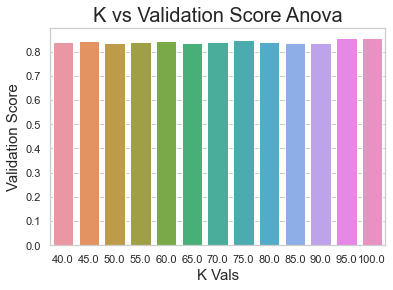

In [130]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.barplot(x='k_Val', y='val_score', data=anova_df)
ax.set_title('K vs Validation Score Anova', fontsize = 20)
ax.set_xlabel('K Vals', fontsize = 15)
ax.set_ylabel('Validation Score', fontsize = 15)

# Model Training


In [224]:
sel = SelectKBest(f_classif, k=95)
X_train = sel.fit_transform(X_train, y_train)
X_val = sel.transform(X_val)



In [225]:
#Logistic Regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)



c:\users\sarth\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

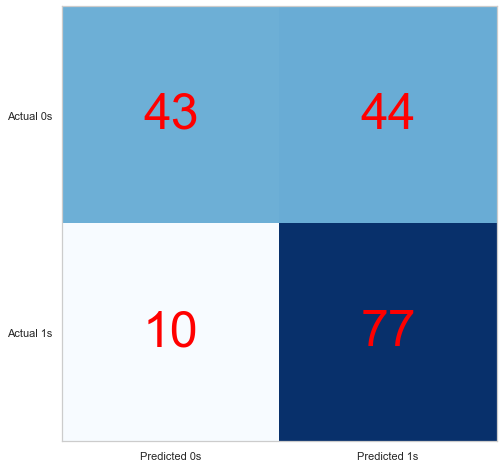

              precision    recall  f1-score   support

           0       0.81      0.49      0.61        87
           1       0.64      0.89      0.74        87

    accuracy                           0.69       174
   macro avg       0.72      0.69      0.68       174
weighted avg       0.72      0.69      0.68       174



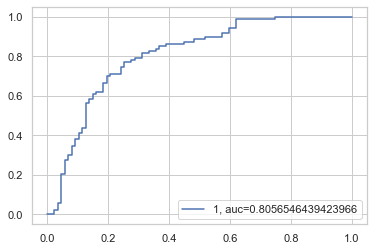

In [226]:
y_pred_lr = lr.predict(X_val)
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

cm = confusion_matrix(y_val, y_pred_lr)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center',fontsize = 50, color='red')
plt.show()

print(classification_report(y_val, y_pred_lr))

y_pred_proba = lr.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

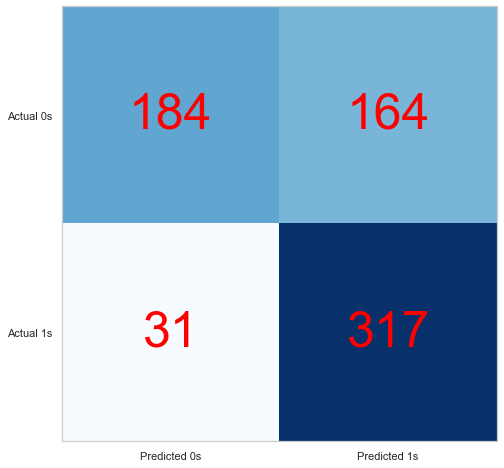

              precision    recall  f1-score   support

           0       0.86      0.53      0.65       348
           1       0.66      0.91      0.76       348

    accuracy                           0.72       696
   macro avg       0.76      0.72      0.71       696
weighted avg       0.76      0.72      0.71       696



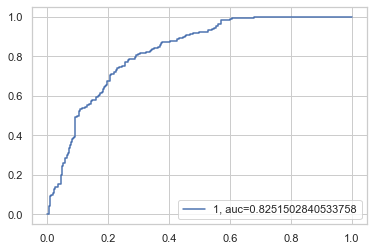

In [227]:
y_pred_lr = lr.predict(X_train)
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_train, y_pred_lr)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center',fontsize = 50,color = 'red', visible = True)
plt.show()

print(classification_report(y_train, y_pred_lr))

y_pred_proba = lr.predict_proba(X_train)[::,1]
fpr, tpr, _ = roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
plt.plot(fpr,tpr,label="1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [188]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

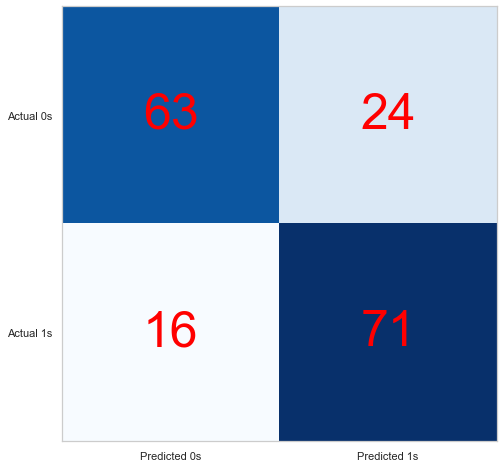

              precision    recall  f1-score   support

           0       0.80      0.72      0.76        87
           1       0.75      0.82      0.78        87

    accuracy                           0.77       174
   macro avg       0.77      0.77      0.77       174
weighted avg       0.77      0.77      0.77       174



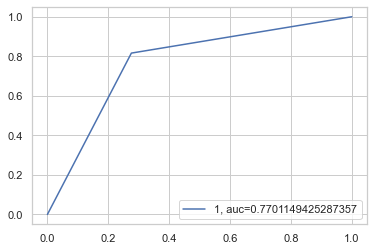

In [192]:
y_pred_dt = dt.predict(X_val)
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

cm = confusion_matrix(y_val, y_pred_dt)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center',fontsize = 50, color='red')
plt.show()

print(classification_report(y_val, y_pred_dt))

y_pred_proba = dt.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

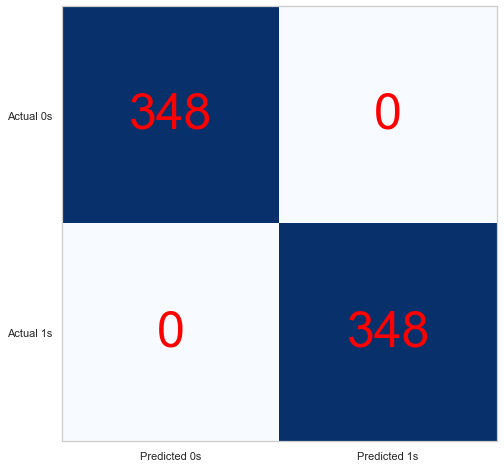

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       348
           1       1.00      1.00      1.00       348

    accuracy                           1.00       696
   macro avg       1.00      1.00      1.00       696
weighted avg       1.00      1.00      1.00       696



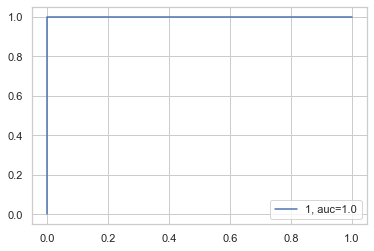

In [190]:
y_pred_dt = dt.predict(X_train)
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

cm = confusion_matrix(y_train, y_pred_dt)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center',fontsize = 50, color='red')
plt.show()

print(classification_report(y_train, y_pred_dt))

y_pred_proba = dt.predict_proba(X_train)[::,1]
fpr, tpr, _ = roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
plt.plot(fpr,tpr,label="1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [210]:
#Random Forest Tree
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(criterion ='entropy', max_depth = 10, max_features = 3, min_samples_split = 5, n_estimators= 10, bootstrap = True,  random_state = 0)
dt.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=3,
                       min_samples_split=5, n_estimators=10, random_state=0)

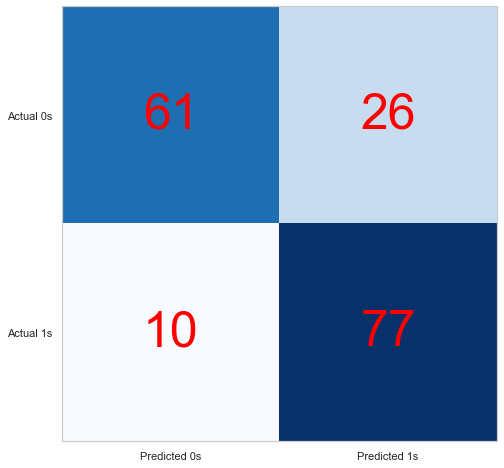

              precision    recall  f1-score   support

           0       0.86      0.70      0.77        87
           1       0.75      0.89      0.81        87

    accuracy                           0.79       174
   macro avg       0.80      0.79      0.79       174
weighted avg       0.80      0.79      0.79       174



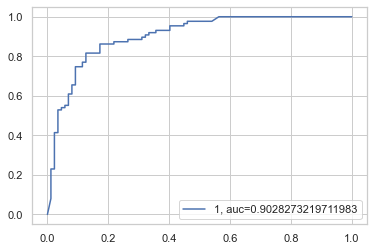

In [211]:
y_pred_dt = dt.predict(X_val)
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

cm = confusion_matrix(y_val, y_pred_dt)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center',fontsize = 50, color='red')
plt.show()

print(classification_report(y_val, y_pred_dt))

y_pred_proba = dt.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

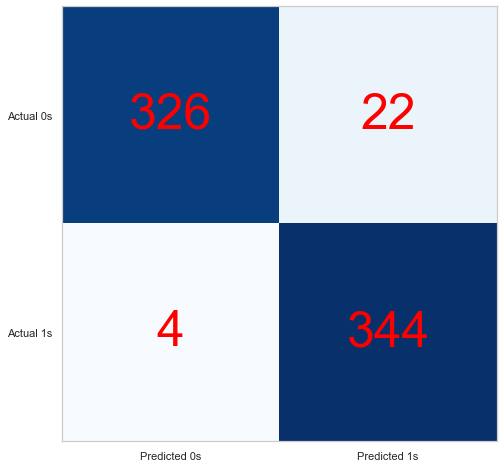

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       348
           1       0.94      0.99      0.96       348

    accuracy                           0.96       696
   macro avg       0.96      0.96      0.96       696
weighted avg       0.96      0.96      0.96       696



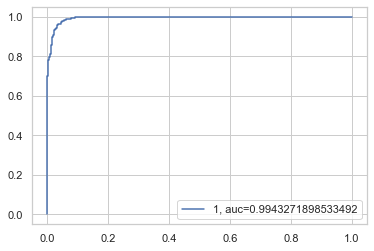

In [212]:
y_pred_dt = dt.predict(X_train)
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

cm = confusion_matrix(y_train, y_pred_dt)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center',fontsize = 50, color='red')
plt.show()

print(classification_report(y_train, y_pred_dt))

y_pred_proba = dt.predict_proba(X_train)[::,1]
fpr, tpr, _ = roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
plt.plot(fpr,tpr,label="1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SVM

In [228]:
from sklearn.svm import SVC

clf = SVC(probability=True)
clf.fit(X_train,y_train)


SVC(probability=True)

[0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1]
[[0.93869093 0.06130907]
 [0.56187803 0.43812197]
 [0.42424921 0.57575079]
 [0.36336624 0.63663376]
 [0.35451471 0.64548529]
 [0.90082628 0.09917372]
 [0.35934655 0.64065345]
 [0.33539642 0.66460358]
 [0.535958   0.464042  ]
 [0.31438501 0.68561499]
 [0.8846924  0.1153076 ]
 [0.31041207 0.68958793]
 [0.35480705 0.64519295]
 [0.39174836 0.60825164]
 [0.94985146 0.05014854]
 [0.33897553 0.66102447]
 [0.36366628 0.63633372]
 [0.47736734 0.52263266]
 [0.87967101 0.12032899]
 [0.41918552 0.58081448]
 [0.90562832 0.09437168]
 [0.39773897 0.60226103]
 [0.34234749 0.65765251]
 [0.36189452 0.63810548]
 [0.87344825 0.12655175]
 [0.90424852 0.095751

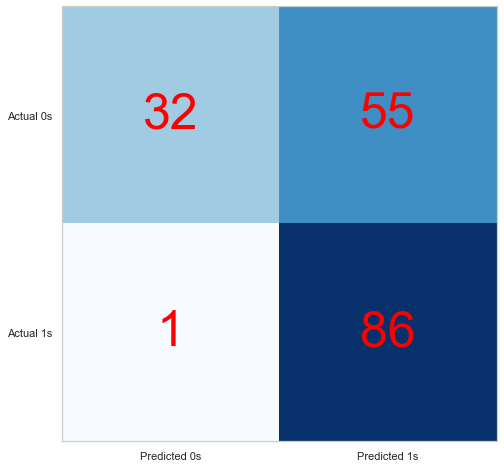

              precision    recall  f1-score   support

           0       0.97      0.37      0.53        87
           1       0.61      0.99      0.75        87

    accuracy                           0.68       174
   macro avg       0.79      0.68      0.64       174
weighted avg       0.79      0.68      0.64       174



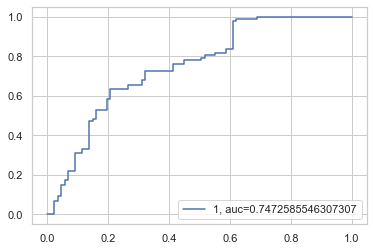

In [229]:
y_pred_svm = clf.predict(X_val)
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

cm = confusion_matrix(y_val, y_pred_svm)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center',fontsize = 50, color='red')
plt.show()

print(classification_report(y_val, y_pred_svm))

y_pred_proba = clf.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

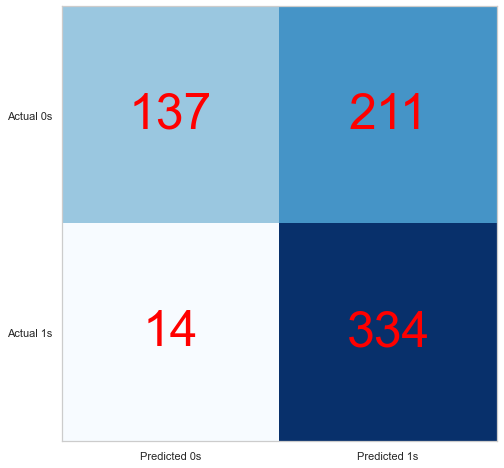

              precision    recall  f1-score   support

           0       0.91      0.39      0.55       348
           1       0.61      0.96      0.75       348

    accuracy                           0.68       696
   macro avg       0.76      0.68      0.65       696
weighted avg       0.76      0.68      0.65       696



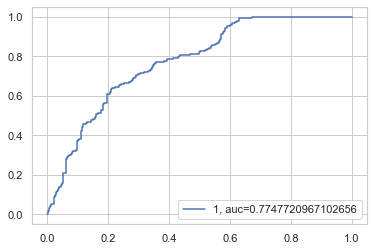

In [230]:
y_pred_svm = clf.predict(X_train)
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

cm = confusion_matrix(y_train, y_pred_svm)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center',fontsize = 50, color='red')
plt.show()

print(classification_report(y_train, y_pred_svm))

y_pred_proba = clf.predict_proba(X_train)[::,1]
fpr, tpr, _ = roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
plt.plot(fpr,tpr,label="1, auc="+str(auc))
plt.legend(loc=4)
plt.show()